### TODO

* [x] Load files from the same animal
* [x] Use MatchID to build decoder
* [x] Train on left reward days, test on right
* [x] Compare this to test performance on left
* [ ] Make a plot of results (trained on left, plot results on right)
* [ ] Make a plot of results (trained on LOGO left)

What is our hypothesis again?

That decoder performance for reward prediction decays w reversal while it doesn't for position?
The OFC activity then represents the expectation of reward, not the position, and therefore we can use it to say something about how fast or slow re-learning reward is?


In [17]:
cd /home/blansdel/dnb2_backup_01-26-2025/schwarz/decoder

/home/blansdel/dnb2_backup_01-26-2025/schwarz/decoder


In [18]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [19]:
pwd

'/home/blansdel/dnb2_backup_01-26-2025/schwarz/decoder'

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from typing import Final

from sklearn.metrics import accuracy_score

from decoder_plotting import *

base_dir = '/home/blansdel/projects/schwarz/decoder/Retracked/'

animals = ['Control Animal 1', 'Control Animal 10', 'Control Animal M3', 'Clonodine Animal F4', 'Clonodine Animal 83', 'IDX Animal F3', 'IDX Animal 80']

sample_dirs = [os.path.join(base_dir, a) for a in animals]
sample_dirs


['/home/blansdel/projects/schwarz/decoder/Retracked/Control Animal 1',
 '/home/blansdel/projects/schwarz/decoder/Retracked/Control Animal 10',
 '/home/blansdel/projects/schwarz/decoder/Retracked/Control Animal M3',
 '/home/blansdel/projects/schwarz/decoder/Retracked/Clonodine Animal F4',
 '/home/blansdel/projects/schwarz/decoder/Retracked/Clonodine Animal 83',
 '/home/blansdel/projects/schwarz/decoder/Retracked/IDX Animal F3',
 '/home/blansdel/projects/schwarz/decoder/Retracked/IDX Animal 80']

In [21]:
#Train the position decoder on this many rows
N_ROWS: Final = 200000

In [22]:
# fn_in = 'retracked_results/results_animal_Control Animal 1.pkl'
# fn_in = 'retracked_results/results_animal_Control Animal 10.pkl'
# fn_in = 'retracked_results/results_animal_Control Animal M3.pkl'
# fn_in = 'retracked_results/results_animal_Clonidine Animal F4.pkl'
# fn_in = 'retracked_results/results_animal_IDX Animal F3.pkl'

fn_in = 'retracked_results/results_animal_Clonidine Animal 83.pkl'
# fn_in = 'retracked_results/results_animal_IDX Animal 80.pkl'

with open(fn_in, 'rb') as f:
    results = pickle.load(f)
test_accuracy_by_group = results['test_accuracy_by_group']

test_groups = results['test_groups']
y_pred_test = results['y_pred_test']
y_test_kmeans = results['y_test_kmeans']
maze_choice = results['trial_choice_test']
y_test_pos = results['y_test_pos']
test_events = results['test_events']

#for each group, get the maze choice
group_to_maze_choice = {}
for group in test_groups.unique():
    group_to_maze_choice[group.split('Rds-')[1]] = maze_choice[test_groups == group].iloc[0]


In [23]:
results

{'train_accs': [0.59413],
 'test_accs': [0.23171582767283894],
 'test_accs_shuffled': [0.12775053503303246],
 'test_accuracy_by_group': {'final_830719.Rds-7.0-1.0': 0.6317873303167421,
  'final_830719.Rds-7.0-10.0': 0.37582314205079964,
  'final_830719.Rds-7.0-11.0': 0.3224043715846995,
  'final_830719.Rds-7.0-12.0': 0.10753880266075388,
  'final_830719.Rds-7.0-2.0': 0.6701388888888888,
  'final_830719.Rds-7.0-3.0': 0.39372822299651566,
  'final_830719.Rds-7.0-4.0': 0.0744336569579288,
  'final_830719.Rds-7.0-5.0': 0.2930648769574944,
  'final_830719.Rds-7.0-6.0': 0.2381342062193126,
  'final_830719.Rds-7.0-7.0': 0.21798520204894706,
  'final_830719.Rds-7.0-8.0': 0.5030864197530864,
  'final_830719.Rds-7.0-9.0': 0.07091945830363507,
  'final_830721.Rds-9.0-1.0': 0.307649667405765,
  'final_830721.Rds-9.0-10.0': 0.07955056179775281,
  'final_830721.Rds-9.0-11.0': 0.07128580946035976,
  'final_830721.Rds-9.0-12.0': 0.49846153846153846,
  'final_830721.Rds-9.0-2.0': 0.5444915254237288,
  

In [7]:
events_and_groups = pd.DataFrame({'event': test_events, 'kmeans': y_test_kmeans})
events_and_groups.groupby(['kmeans', 'event']).count()

Empty DataFrame
Columns: []
Index: [(0, In Middle), (0, In Start), (0, middle_left), (0, middle_right), (1, In Left), (1, In Left decision), (1, middle_left), (2, lspout_exit), (3, In Reward), (3, In Right), (3, In Right Exit), (3, rspout_exit), (3, rspout_first), (4, In Right Exit), (4, In Start), (4, lspout_exit), (4, rspout_exit), (5, In Left), (5, In Right), (5, In Right decision), (5, middle_left), (5, middle_right), (6, In Right Exit), (6, rspout_exit), (7, In Start), (7, lspout_exit), (8, In Left), (8, In Left Exit), (8, In Left Spout), (8, lspout_exit), (8, lspout_first), (9, In Left Exit), (9, lspout_exit)]

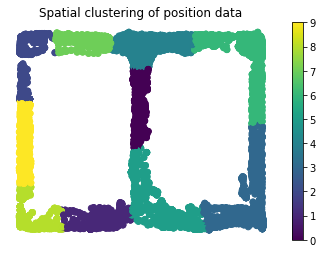

In [16]:
plt.scatter(y_test_pos[:, 0], y_test_pos[:, 1], c=y_test_kmeans)
plt.colorbar()
plt.axis('off')
plt.gcf().set_size_inches(6, 4)
plt.title('Spatial clustering of position data')
plt.savefig('kmeans_clustering_test_data.png', dpi=300, bbox_inches='tight')

(array([ 3680.,  1010.,  1318., 18830.,  6043.,  2246.,  1751.,   711.,
         6194.,  1205.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

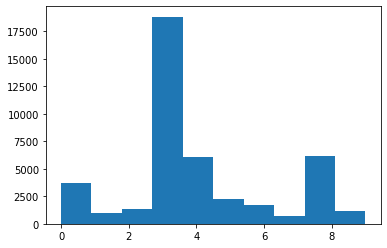

In [29]:
plt.figure()
plt.hist(y_test_kmeans, bins=10)

(array([ 2332.,   488.,  2235.,  1800., 12926.,   276.,   180.,   732.,
        16893.,  5126.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

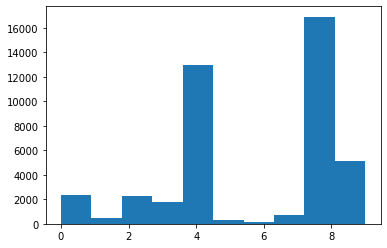

In [30]:
plt.figure()
plt.hist(y_pred_test, bins=10)

In [31]:
accuracy = accuracy_score(y_test_kmeans, y_pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.23171582767283894


In [32]:
#Reshape predictions to be by group
y_pred_test_by_group = []
y_test_kmeans_by_group = []
for group in test_groups.unique():
    pred_counts = np.unique(y_pred_test[test_groups == group], return_counts=True)
    #Fill in missing values with zero
    pred_counts = dict(zip(pred_counts[0], pred_counts[1]))
    for i in range(10):
        if i not in pred_counts:
            pred_counts[i] = 0
    #Normalize
    pred_counts = {k: v/sum(pred_counts.values()) for k, v in pred_counts.items()}
    y_pred_test_by_group.append([v[1] for v in sorted(pred_counts.items())])

    #Do the same for the true values
    keamns_counts = np.unique(y_test_kmeans[test_groups == group], return_counts=True)
    keamns_counts = dict(zip(keamns_counts[0], keamns_counts[1]))
    for i in range(10):
        if i not in keamns_counts:
            keamns_counts[i] = 0
    keamns_counts = {k: v/sum(keamns_counts.values()) for k, v in keamns_counts.items()}
    y_test_kmeans_by_group.append([v[1] for v in sorted(keamns_counts.items())])


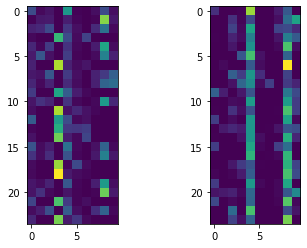

In [33]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(y_test_kmeans_by_group)
axes[1].imshow(y_pred_test_by_group)

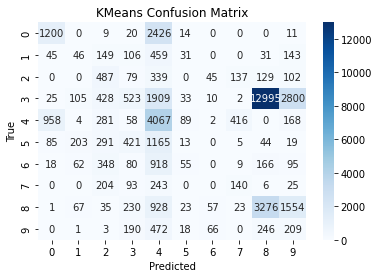

In [34]:
fig, ax = plot_confusion_matrix(y_test_kmeans, y_pred_test, classes=np.arange(10), title='KMeans Confusion Matrix')

How can we quantify this? We have variance in accuracy for previously-rewarded maze choice, and variance in accuracy 

In [35]:
def compute_effect_size(df):
    x = df[df['maze_choice'] == 'left']['accuracy']
    y = df[df['maze_choice'] == 'right']['accuracy']
    return (np.mean(x) - np.mean(y)) / np.sqrt(0.5*(np.std(x)**2 + np.std(y)**2))

def effect_size(test_accuracy_by_group, group_to_maze_choice):
    df_cohen = pd.DataFrame(test_accuracy_by_group.items(), columns=['group', 'accuracy'])
    df_cohen.group = df_cohen.group.str.split('Rds-').str[1]
    df_group_to_maze_choice = pd.DataFrame(group_to_maze_choice.items(), columns=['group', 'maze_choice'])
    df_cohen = df_cohen.merge(df_group_to_maze_choice, on='group')
    effect_size = compute_effect_size(df_cohen)
    print("Effect size:", effect_size)

In [223]:
effect_size(test_accuracy_by_group, group_to_maze_choice)

Effect size: 2.45136428587904


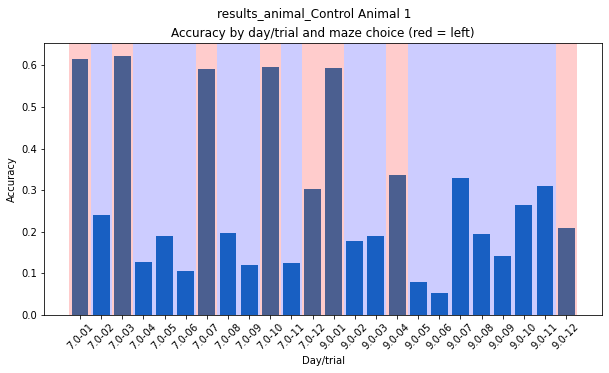

In [220]:
plot_accuracy_by_group(test_accuracy_by_group, group_to_maze_choice, fn_in)

In [235]:
effect_size(test_accuracy_by_group, group_to_maze_choice)

Effect size: -1.208334583763357


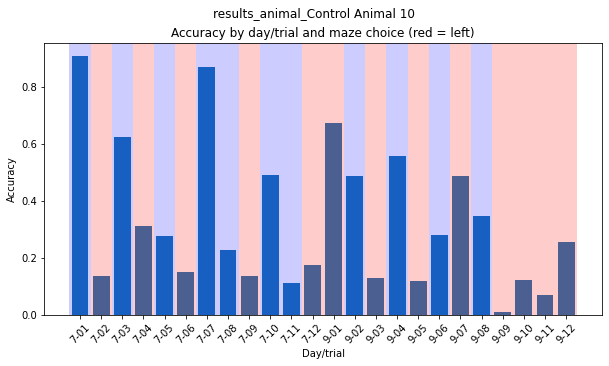

In [201]:
plot_accuracy_by_group(test_accuracy_by_group, group_to_maze_choice, fn_in)

In [246]:
effect_size(test_accuracy_by_group, group_to_maze_choice)

Effect size: 3.101755787814099


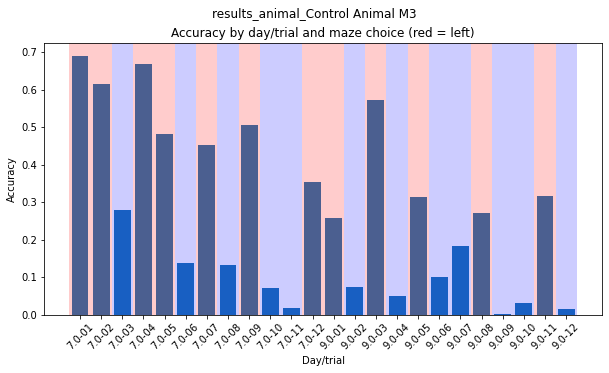

In [247]:
plot_accuracy_by_group(test_accuracy_by_group, group_to_maze_choice, fn_in)

In [36]:
effect_size(test_accuracy_by_group, group_to_maze_choice)

Effect size: 3.0334715150180505


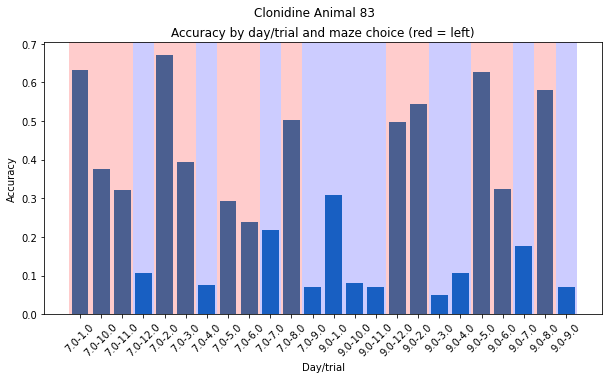

In [37]:
plot_accuracy_by_group(test_accuracy_by_group, group_to_maze_choice, fn_in)

In [258]:
effect_size(test_accuracy_by_group, group_to_maze_choice)

Effect size: 5.091167801552144


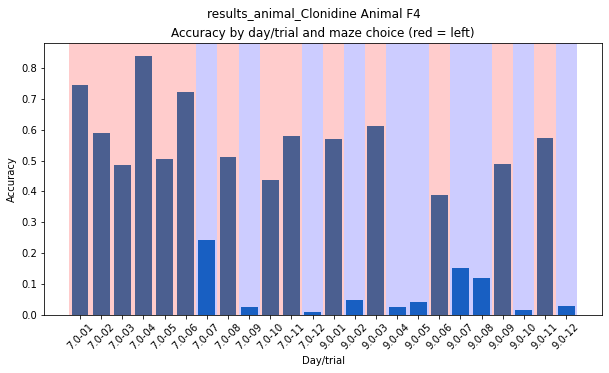

In [180]:
plot_accuracy_by_group(test_accuracy_by_group, group_to_maze_choice, fn_in)

In [24]:
effect_size(test_accuracy_by_group, group_to_maze_choice)

Effect size: -1.2072195161232793


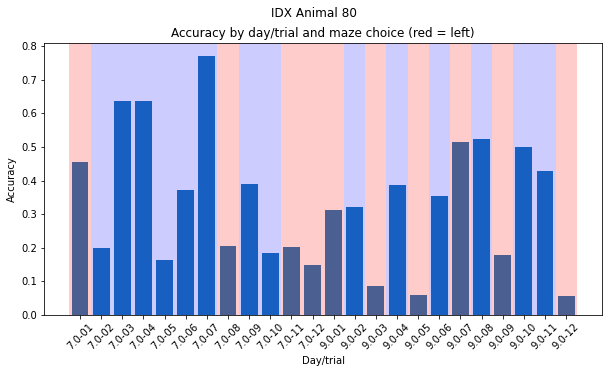

In [25]:
plot_accuracy_by_group(test_accuracy_by_group, group_to_maze_choice, fn_in)

In [269]:
effect_size(test_accuracy_by_group, group_to_maze_choice)

Effect size: 1.8940031193342914


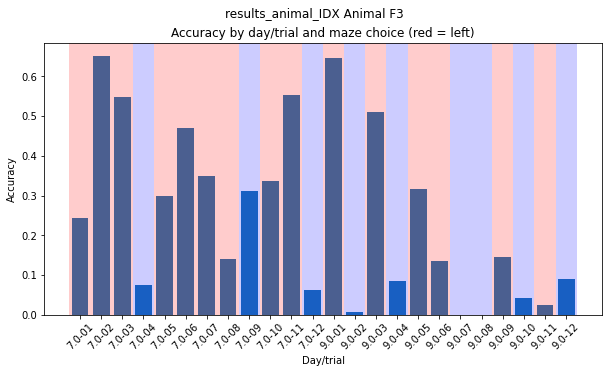

In [270]:
plot_accuracy_by_group(test_accuracy_by_group, group_to_maze_choice, fn_in)

In [ ]:
# Load all results and put the effect sizes into a table
effect_sizes = []
# Put the results into a table